In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from scipy.sparse import diags
from numpy.linalg import inv, norm, solve

In [2]:
#Limit the output
np.set_printoptions(threshold=5)

# a) Iterative Methods

In [3]:
#Initilization
n_list = [2, 4, 8, 16, 32, 64, 128, 256]
diff = 0.0001
values = [-1, 4, -1]
w = 1.3
Jacobian_times = []
Gauss_Seidel_times = []
SOR_times= []

Jacobian_errors = []
Gauss_Seidel_errors = []
SOR_errors = []

### 1. Jacobian

In [4]:
def solve_Jacobian_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Jacobian method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Jacobian method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))
    
    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D), (b - np.dot((L + U),X[-1]))))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Jacobian_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Jacobian_times.append(seconds)
    Jacobian_errors.append(error)
    print("\n")

Start Jacobian method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.25 0.25]
iteration 2 = [0.3125 0.3125]
iteration 3 = [0.328125 0.328125]
iteration 4 = [0.33203125 0.33203125]
iteration 5 = [0.33300781 0.33300781]
iteration 6 = [0.33325195 0.33325195]

Final Answer is: [0.33325195 0.33325195]


Start Jacobian method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25 0.25 0.25 0.25]
iteration 2 = [0.3125 0.375  0.375  0.3125]
iteration 3 = [0.34375  0.421875 0.421875 0.34375 ]
iteration 4 = [0.35546875 0.44140625 0.44140625 0.35546875]
iteration 5 = [0.36035156 0.44921875 0.44921875 0.36035156]
iteration 6 = [0.36230469 0.45239258 0.45239258 0.36230469]
iteration 7 = [0.36309814 0.45367432 0.45367432 0.36309814]
iteration 8 = [0.36341858 0.45419312 0.45419312 0.36341858]
iteration 9 = [0.36354828 0.45440292 0.45440292 0.36354828]
iteration 10 = [0.36360073 0.4544878  0.4544878  0.36360073]

Final Answer is: [0.36360073 0.4544878  0.4544878  0.36360073]


Start Jacobia

### 2. Gauss–Seidel

In [5]:
def solve_Gauss_Seidel_tridiagonal(A, b, n, diff):
    """ 
    Solve Ax = b with Gauss-Seidel method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start Gauss-Seidel method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + L), b - np.dot(U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]


#Solve for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_Gauss_Seidel_tridiagonal(A, b, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    Gauss_Seidel_times.append(seconds)
    Gauss_Seidel_errors.append(error)

    print("\n")     

Start Gauss-Seidel method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.25   0.3125]
iteration 2 = [0.328125   0.33203125]
iteration 3 = [0.33300781 0.33325195]
iteration 4 = [0.33331299 0.33332825]

Final Answer is: [0.33331299 0.33332825]


Start Gauss-Seidel method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   0.33203125]
iteration 2 = [0.328125   0.4140625  0.43652344 0.35913086]
iteration 3 = [0.35351562 0.44750977 0.45166016 0.36291504]
iteration 4 = [0.36187744 0.4533844  0.45407486 0.36351871]
iteration 5 = [0.3633461  0.45435524 0.45446849 0.36361712]
iteration 6 = [0.36358881 0.45451432 0.45453286 0.36363322]

Final Answer is: [0.36358881 0.45451432 0.45453286 0.36363322]


Start Gauss-Seidel method for n =  8 

First Guess = [0. 0. 0. ... 0. 0. 0.]
iteration 1 = [0.25       0.3125     0.328125   ... 0.33325195 0.33331299 0.33332825]
iteration 2 = [0.328125   0.4140625  0.43652344 ... 0.44430542 0.44440842 0.3611021 ]
iteration

### 3. SOR

In [6]:
def solve_SOR_tridiagonal(A, b, w, n, diff):
    """ 
    Solve Ax = b with SOR method and iterate until 
    we have diffrence less than 0.0001
    """
    
    print("Start SOR method for n = ", n,'\n')
    
    #Define L, D, U 
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))

    #Initial Guess
    X = []
    X.append(np.zeros(n))
    print('First Guess =', X[0])
    
    #Iteration
    i = 0
    start = time.time()
    while True:
        i += 1
        X.append(np.dot(inv(D + w * L), w * b + np.dot( (1-w) * D - w * U, X[-1]) ))
        if norm(X[-1] - X[-2]) < diff:
             break 
        print("iteration", i, "=", X[-1])  
    finish = time.time()
    seconds = finish - start
    print("\nFinal Answer is:", X[-2])
    return seconds, X[-2]

#Solver for differnt n
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    b = np.ones(n)
    seconds, final_answer = solve_SOR_tridiagonal(A, b, w, n, diff)
    exact_sol = solve(A,b)
    error = norm(exact_sol - final_answer)
    
    SOR_times.append(seconds)
    SOR_errors.append(error)

    print("\n")     

Start SOR method for n =  2 

First Guess = [0. 0.]
iteration 1 = [0.325    0.430625]
iteration 2 = [0.36745312 0.31523477]
iteration 3 = [0.31721536 0.33352456]
iteration 4 = [0.33823087 0.33486767]
iteration 5 = [0.33236273 0.33255759]
iteration 6 = [0.3333724  0.33357875]
iteration 7 = [0.33340138 0.33328182]
iteration 8 = [0.33329618 0.33333671]

Final Answer is: [0.33329618 0.33333671]


Start SOR method for n =  4 

First Guess = [0. 0. 0. 0.]
iteration 1 = [0.325      0.430625   0.46495313 0.47610977]
iteration 2 = [0.36745312 0.46634453 0.49181171 0.34200588]
iteration 3 = [0.36632604 0.46399141 0.4394056  0.36520506]
iteration 4 = [0.3658994  0.4475267  0.45731614 0.36406623]
iteration 5 = [0.36067636 0.45658955 0.45451829 0.36349857]
iteration 6 = [0.3651887  0.4544279  0.45447062 0.36365338]
iteration 7 = [0.36313246 0.45439263 0.45452377 0.36362421]
iteration 8 = [0.36373787 0.45461724 0.45457134 0.36364842]
iteration 9 = [0.36362924 0.45453002 0.45453659 0.36362987]

Final

# b) Comparison

### Time

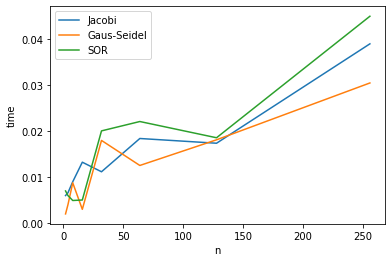

In [7]:
plt.plot(n_list,Jacobian_times, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_times, label = "Gaus-Seidel")
plt.plot(n_list,SOR_times, label = "SOR")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

## Accuaracy

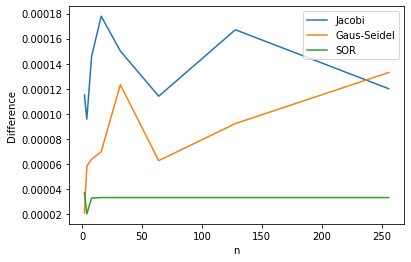

In [8]:
plt.plot(n_list,Jacobian_errors, label = "Jacobi")
plt.plot(n_list,Gauss_Seidel_errors, label = "Gaus-Seidel")
plt.plot(n_list,SOR_errors, label = "SOR")
plt.ylabel("Difference")
plt.xlabel("n")
plt.legend()
plt.show()

# LU

### Without Partial Pivoting

In [9]:
def LU(A):
    
    """Find L and U that A = LU
    without pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    for k in range(n-1):
        for i in range(k+1, n):
            if A[k,k] != 0:
                A[i,k] = A[i,k] / A[k,k]
            else:
                print("Failed!")
                break
                
            for j in range(k+1,n):      
                A[i,j] = A[i,j] - A[i,k]*A[k,j]

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
    finish = time.time()  
    return finish - start

lu_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_time.append(LU(A))
    
lu_time

[0.0,
 0.0,
 0.0004935264587402344,
 0.0025713443756103516,
 0.007012367248535156,
 0.06083965301513672,
 0.4329957962036133,
 3.887474536895752]

### With Partial Pivoting

In [10]:
def LU_pivot(A):
    
    """Find L and U that A = LU
    with pivoting"""
    
    start = time.time()
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    np.fill_diagonal(L, 1)

    piv = np.arange(0,n)
    
    for k in range(n-1):
        r = np.argmax(abs(A[k:n,k])) + k
        piv[[k, r]] = piv[[r, k]]
        A[[k, r]] = A[[r, k]]
 
        for i in range(k+1, n):          
            A[i, k] = A[i, k] / A[k, k]
            
            for j in range(k+1, n):      
                A[i, j] =  A[i, j] - A[i, k]*A[k, j] 
 

    for i in range(n):
        for j in range(n):
            if j >= i:
                U[i, j] = A[i, j]
            else:
                L[i, j] = A[i, j]
                
    finish = time.time()  
    return finish - start

lu_pivot_time = []
for n in n_list:
    a = np.array([values[0] * np.ones(n-1), values[1] * np.ones(n), values[2] * np.ones(n-1)])
    offset = [-1,0,1]
    A = diags(a,offset).toarray()
    lu_pivot_time.append(LU_pivot(A))
    
lu_pivot_time    

[0.0,
 0.0009083747863769531,
 0.0005595684051513672,
 0.0014548301696777344,
 0.008986473083496094,
 0.06083989143371582,
 0.4476017951965332,
 3.7875194549560547]

## Comparison

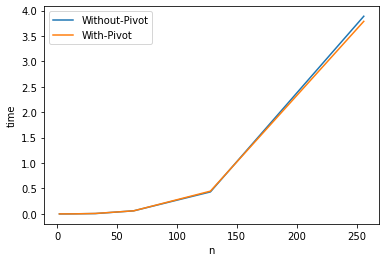

In [11]:
plt.plot(n_list,lu_time, label = "Without-Pivot")
plt.plot(n_list,lu_pivot_time, label = "With-Pivot")
plt.ylabel("time")
plt.xlabel("n")
plt.legend()
plt.show()

## Prove O(N ^ 3)

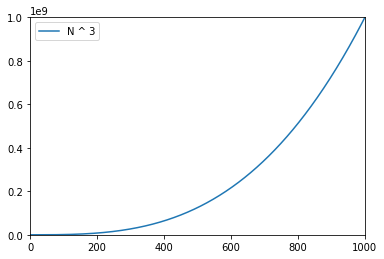

In [12]:
#Compare with Previous Plot
mylist = []
for i in range(1000):
    mylist.append(i ** 3)
plt.plot(list(range(1000)),mylist, label = "N ^ 3")
plt.xlim(0, 1000)
plt.ylim(0, 1000 ** 3)
plt.legend()
plt.show()

In [13]:
Ratio_lu = []
for i in range(3, 7):
    Ratio_lu.append(lu_time[i + 1] / lu_time[i])
Ratio_lu    

[2.7271210013908207, 8.676050591595267, 7.1169997648718555, 8.978088404044675]

In [14]:
sum(Ratio_lu) / len(Ratio_lu)

6.874564940475654

In [15]:
Ratio_pivot_lu = []
for i in range(3, 7):
    Ratio_pivot_lu.append(lu_pivot_time[i + 1] / lu_pivot_time[i])
Ratio_pivot_lu    

[6.176991150442478, 6.77016342990555, 7.35704460755307, 8.461805773797286]

In [16]:
sum(Ratio_pivot_lu) / len(Ratio_pivot_lu)

7.191501240424596